Loading the data and extracting out the features for prediction

In [187]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier


df = pd.read_csv('bc_data_clean.csv')
feats = df.dropna().iloc[:,1:10].values

### Logistic Regression

In [188]:
X = StandardScaler().fit_transform(feats)
y = df.dropna().cancer.values
lr = LogisticRegression()
forest = RandomForestClassifier(n_estimators=150,)

mod = lr

kf = KFold(n_splits=4)

for train_index, test_index in kf.split(X):
    X_train = X[train_index,:]
    X_test = X[test_index,:]
    y_train = y[train_index]
    y_test = y[test_index]
    
    fit = mod.fit(X_train,y_train)
    y_pred = fit.predict_proba(X_test)[:, 1]
    fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred)
    print('AUROC: %3.2f' % roc_auc_score(y_test,y_pred))
    print('f1: %3.2f' % f1_score(y_test,fit.predict(X_test)))
    
    

AUROC: 1.00
f1: 0.93
AUROC: 0.99
f1: 0.94
AUROC: 1.00
f1: 0.95
AUROC: 1.00
f1: 1.00


### ROC curve for LR

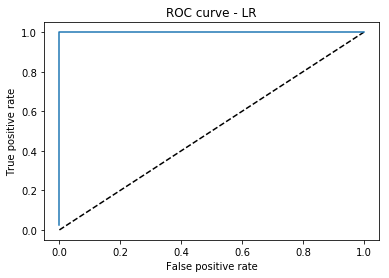

In [189]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR')
# plt.legend(loc='best')
plt.show()

### Random Forest Classification
This allows us to easily look at feature importance

In [190]:
forest = RandomForestClassifier(n_estimators=150,)

mod = forest

kf = KFold(n_splits=4)

for train_index, test_index in kf.split(X):
    X_train = X[train_index,:]
    X_test = X[test_index,:]
    y_train = y[train_index]
    y_test = y[test_index]
    
    fit = mod.fit(X_train,y_train)
    y_pred = fit.predict_proba(X_test)[:, 1]
    fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred)
    print('AUROC: %3.2f' % roc_auc_score(y_test,y_pred))
    print('f1: %3.2f' % f1_score(y_test,fit.predict(X_test)))
    

AUROC: 0.99
f1: 0.93
AUROC: 0.97
f1: 0.95
AUROC: 1.00
f1: 0.94
AUROC: 1.00
f1: 0.99


### ROC Curve for RF

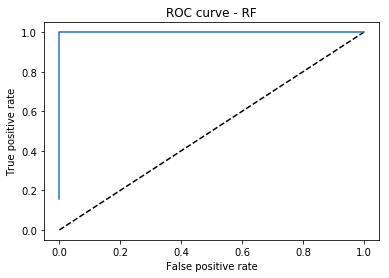

In [191]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF')
# plt.legend(loc='best')
plt.show()

### Feature Importance
It looks like Clump Thickness, Uniform Cell Size and Uniform Cell Shape are most informative for the classification

Feature ranking:
1.  clump_thick (0.250791)
2.  unif_size (0.222201)
3.  unif_shape (0.202962)
4.  marg_adhesion (0.090788)
5.  epith_size (0.072046)
6.  bare_nuclei (0.071142)
7.  bland_chromatin (0.057374)
8.  norm_nucleoli (0.022434)
9.  mitoses (0.010262)


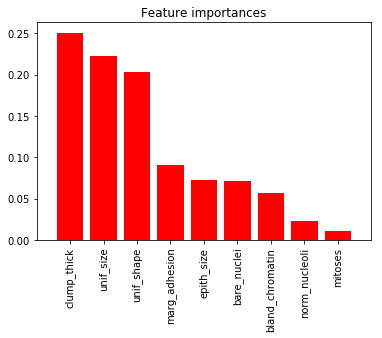

In [192]:
names = df.columns[1:10]

importances = mod.feature_importances_
std = np.std([tree.feature_importances_ for tree in mod.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d.  %s (%f)" % (f + 1, names[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), names,rotation='vertical')

plt.xlim([-1, X.shape[1]])
plt.show()